## 七月在线机器学习实训营三期第四周(数据可视化及拟合)考试
#### 考试说明:
- 起止时间：请同学在2018年3月2日至3月4日期间完成，最晚提交时间本周日（3月4日24时之前）结束，<b>逾期不接受补考,该考试分数计入平时成绩</b>
- 考试方式：请同学<font color=red><b>拷贝</b></font>该试卷至自己姓名的目录后，将文件更名为同学姓名拼音-exam4后，进行作答。例如wangwei-exam4
- 提交格式：请同学新建自己姓名全拼的文件夹，将该试卷，zip文件等相关考试文件，放置此目录下。将该目录<b>移动</b>至/0.Teacher/Exam/4/目录下
- 注意事项：为确保同学们真正了解自身对本周课程的掌握程度，<font color=red><b>请勿翻阅，移动，更改</b></font>其它同学试卷。如发现按0分处理
- 请同学在下方同学姓名处填写自己的姓名，批改人和最终得分不用填写

- 同学姓名:<u>___邓嘉__</u>  
- 批改人： David
- 最终得分:85

<center><h1>####答卷开始####</h1></center>
<hr>

## 问答题(共5题，每题4分，共计20分)
- note：
15分

### 1.谈谈您对数据可视，以及其对数据分析，机器学习的意义的理解

***您的答案
通过可视化可以直观的看到数据的关联分析，数值比较，分布情况，分类分析，对机器学习的特征提取有有指导意义

### 2.某评测网站对市场上某品牌充电宝随机抽取30款测得其使用寿命数据，请问哪些可视化方案适宜呈现该结果？这些方案透露出了哪些含义

***您的答案
可以通过查看起灰度图查看其寿命的分布图，密度图，可直观看到其寿命的分布情况


### 3.	一组数据的分布特征可以从哪几个方面进行描述？

***您的答案
均值 ，方差，概率密度分布

### 4.（接上题）如何从可视化的角度解读一组数据的分布特征？(代码演示有额外加分)

***您的答案
下图可以看到数据主要是

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

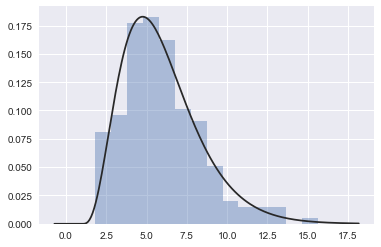

In [2]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma)

### 5.简要谈谈您对seaborn库的理解，以及有哪些较高级的用法。(代码演示有额外加分)

***您的答案
seaborn是在matplit基础上的进一步的封装，使用较matplit更为简单方便

## 实战题(共四题，每题20分)
#### (注意:题目均要求使用seaborn库进行)

- note:
70分

### 1.航班乘客变化分析

- 载入相应绘图库及航班乘客数据（flights）

In [5]:
# your code
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


- 分析年度乘客总量变化情况（折线图）

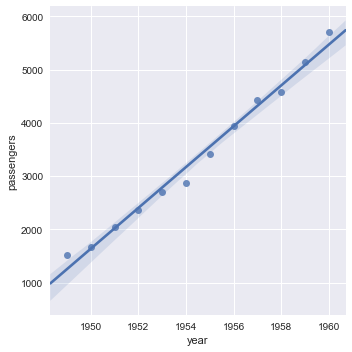

In [8]:
# your code
data_year=data.groupby("year",as_index=False).agg({"passengers":np.sum})
sns.lmplot(x="year",y="passengers",data=data_year)

- 分析乘客在一年中各月份的分布（柱状图）

-note: 这样汇总不太方便解释。

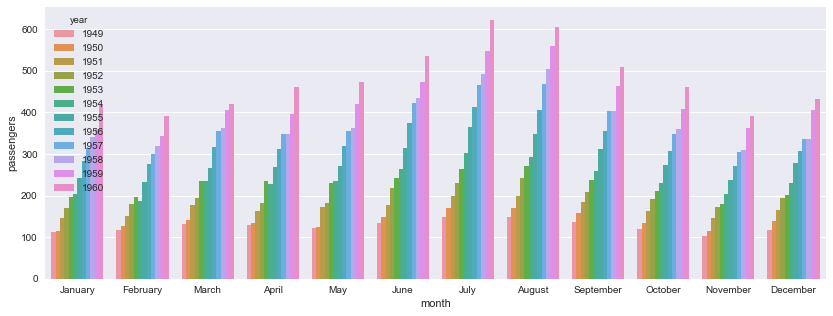

In [12]:
# your code
fig,ax=plt.subplots(figsize=(14,5))
sns.barplot(x='month',y='passengers',hue="year",data=data,ax=ax)

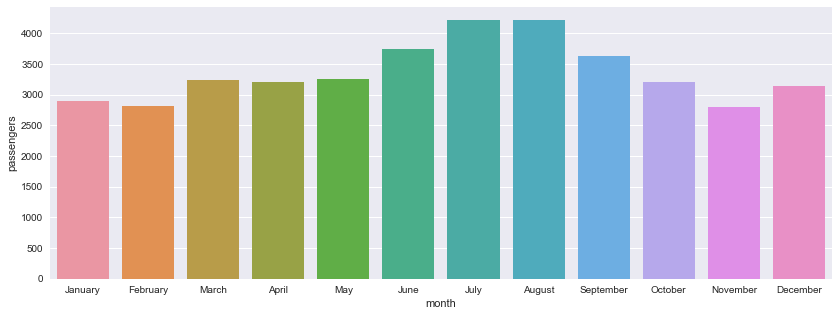

In [18]:
fig,ax=plt.subplots(figsize=(14,5))
data1=data.groupby("month",as_index=False).agg({"passengers":np.sum})
sns.barplot(x='month',y='passengers',data=data1,ax=ax)

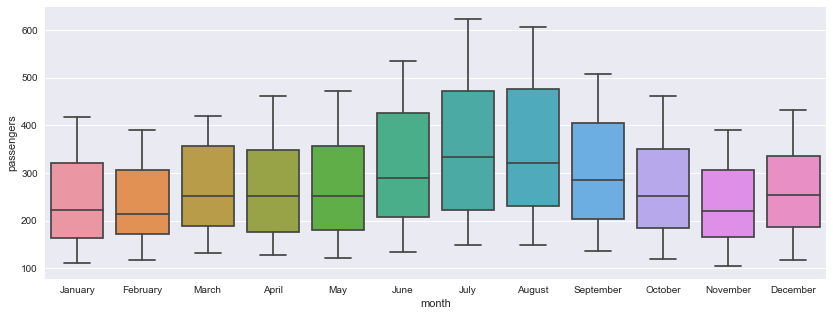

In [20]:
fig,ax=plt.subplots(figsize=(14,5))
sns.boxplot(x="month",y="passengers",data=data,ax=ax)

### 2.鸢尾花花型尺寸分析

* 载入iris数据集
* 萼片（sepal）和花瓣（petal）的大小关系（散点图）
- 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）
* 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）

In [21]:
# your code
data = sns.load_dataset("iris")
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
data["sepai_area"]=data.sepal_length*data.sepal_width
data["petal_area"]=data.petal_length*data.petal_width

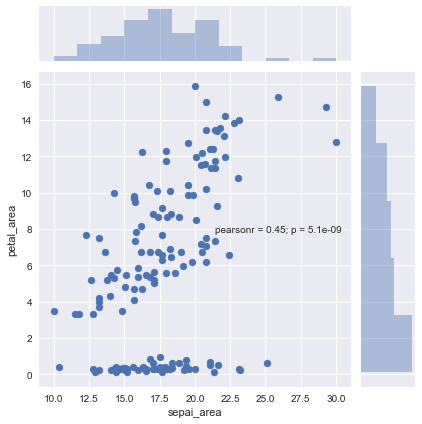

In [23]:
sns.jointplot(x="sepai_area",y="petal_area",data=data)

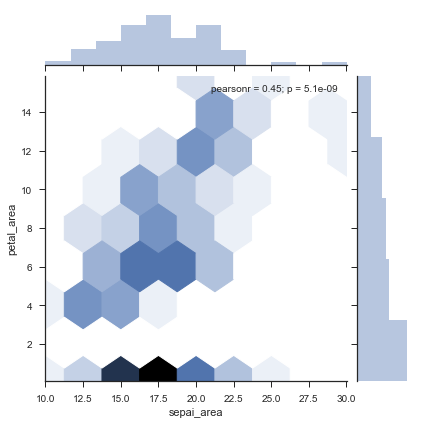

In [24]:
with sns.axes_style("ticks"):
    sns.jointplot(x=data["sepai_area"],y=data["petal_area"],kind="hex")

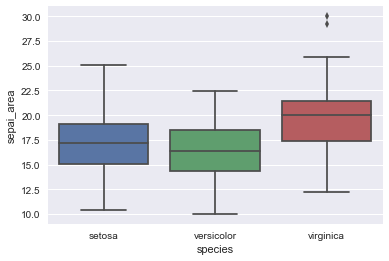

In [25]:
sns.boxplot(x="species",y="sepai_area",data=data)

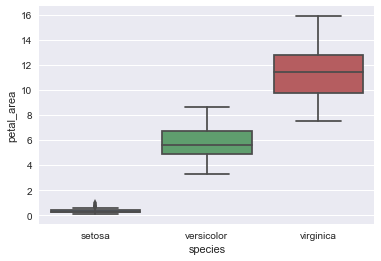

In [26]:
sns.boxplot(x="species",y="petal_area",data=data)

- note:   
    漂亮 的beeswarm

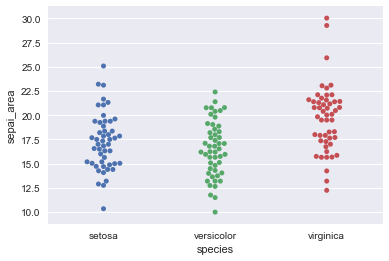

In [27]:
sns.swarmplot(y="sepai_area",x="species",data=data)

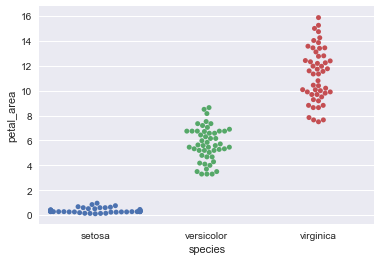

In [29]:
sns.swarmplot(y="petal_area",x="species",data=data)

### 3.餐厅小费情况分析
* 载入tips数据集
* 小费和总消费之间的关系（散点图）
* 男性顾客和女性顾客，谁更慷慨（分类箱式图）
* 抽烟与否是否会对小费金额产生影响（分类箱式图）
* 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
* 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）
* 就餐人数是否会对慷慨度产生影响（分类箱式图）
* 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

In [30]:
data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
# your code

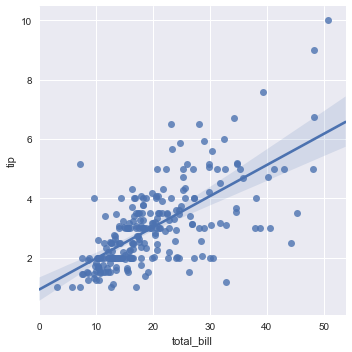

In [31]:
sns.lmplot(x="total_bill",y="tip",data=data)

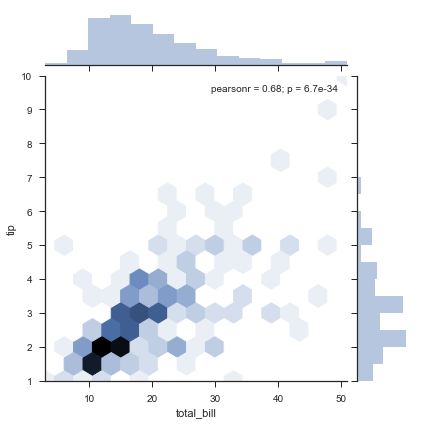

In [32]:
with sns.axes_style("ticks"):
    sns.jointplot(x=data["total_bill"],y=data["tip"],kind="hex")

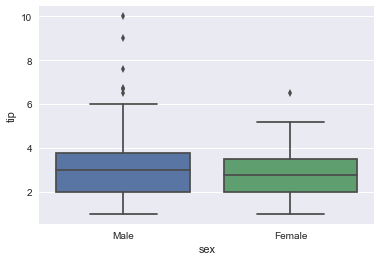

In [33]:
sns.boxplot(x="sex",y="tip",data=data)

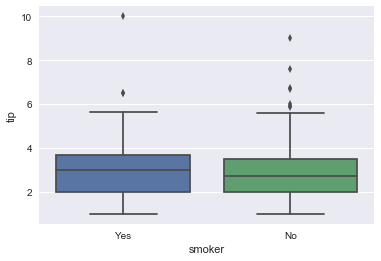

In [34]:
sns.boxplot(x="smoker",y="tip",data=data)

In [35]:
frame=[data[data.day=="Thur"],data[data.day=="Fri"]]
data3=pd.concat(frame)
data3["vocation"]=False
frame=[data[data.day=="Sat"],data[data.day=="Sun"]]
data4=pd.concat(frame)
data4["vocation"]=True
frame2=[data3,data4]
data5=pd.concat(frame2)

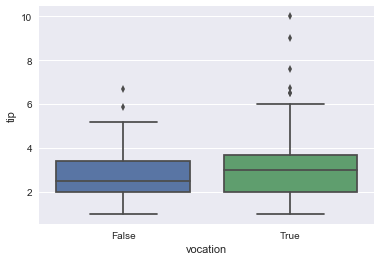

In [36]:
sns.boxplot(x="vocation",y="tip",data=data5)

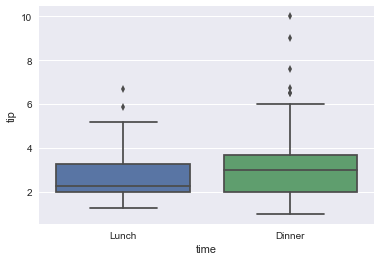

In [37]:
sns.boxplot(x="time",y="tip",data=data)

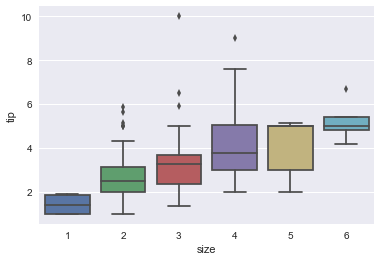

In [38]:
sns.boxplot(x="size",y="tip",data=data)

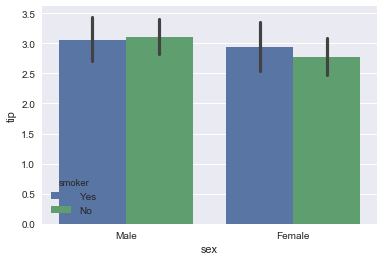

In [39]:
sns.barplot(x="sex", y="tip", hue="smoker", data=data)

### 4.泰坦尼克号海难幸存状况分析
* 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）
* 不同性别的幸存比例（堆积柱状图）
* 幸存和遇难乘客的票价分布（分类箱式图）
* 幸存和遇难乘客的年龄分布（分类箱式图）
* 不同上船港口的乘客仓位等级分布（分组柱状图）
* 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）
* 幸存和遇难乘客父母子女的数量分布（分类箱式图）
* 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

In [41]:
# your code
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [63]:
data1=data[data.pclass==1]
data1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True


* 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）


In [89]:
frame=[]
for item in range(1,4):
    temp=data[data.pclass==item].groupby("survived",as_index=False).count()
    temp["class_p"]=item
    frame.append(temp)
frame
df=pd.concat(frame)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,class_p
0,0,80,80,64,80,80,80,80,80,80,80,58,80,80,80,1
1,1,136,136,122,136,136,136,134,136,136,136,117,134,136,136,1
0,0,97,97,90,97,97,97,97,97,97,97,3,97,97,97,2
1,1,87,87,83,87,87,87,87,87,87,87,13,87,87,87,2
0,0,372,372,270,372,372,372,372,372,372,372,6,372,372,372,3
1,1,119,119,85,119,119,119,119,119,119,119,6,119,119,119,3


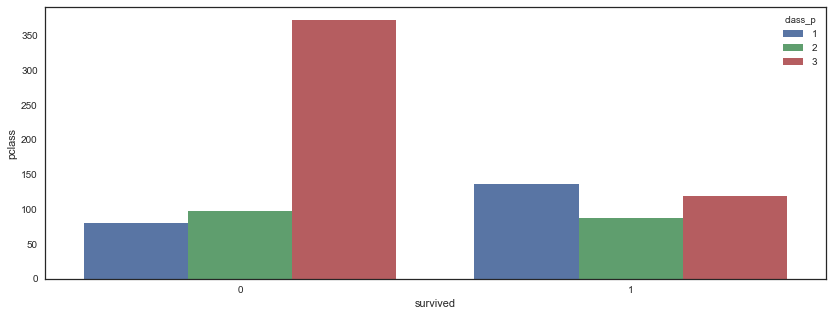

In [93]:
fig,ax=plt.subplots(figsize=(14,5))
sns.barplot(x="survived",y="pclass",hue="class_p",data=df,ax=ax)


* 不同性别的幸存比例（堆积柱状图）


In [112]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [122]:
frame=[]
for item in data.sex.unique():
    temp=data[data.sex==item].groupby("survived",as_index=False).count()
    temp["sex_s"]=item
    frame.append(temp)
ds=pd.concat(frame)
ds

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_s
0,0,468,468,360,468,468,468,468,468,468,468,61,468,468,468,male
1,1,109,109,93,109,109,109,109,109,109,109,45,109,109,109,male
0,0,81,81,64,81,81,81,81,81,81,81,6,81,81,81,female
1,1,233,233,197,233,233,233,231,233,233,233,91,231,233,233,female


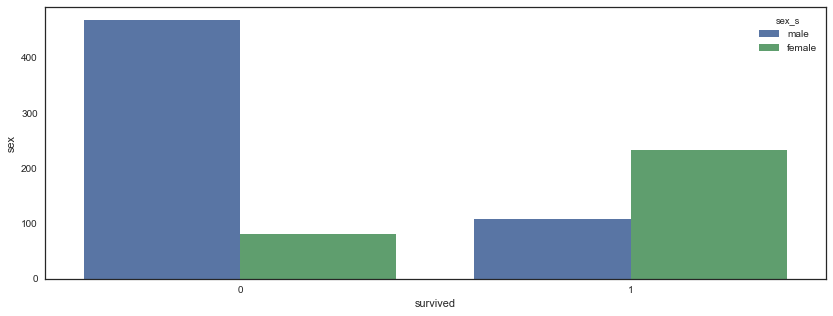

In [123]:
fig,ax=plt.subplots(figsize=(14,5))
sns.barplot(x="survived",y="sex",hue="sex_s",data=ds,ax=ax)

* 幸存和遇难乘客的票价分布（分类箱式图）


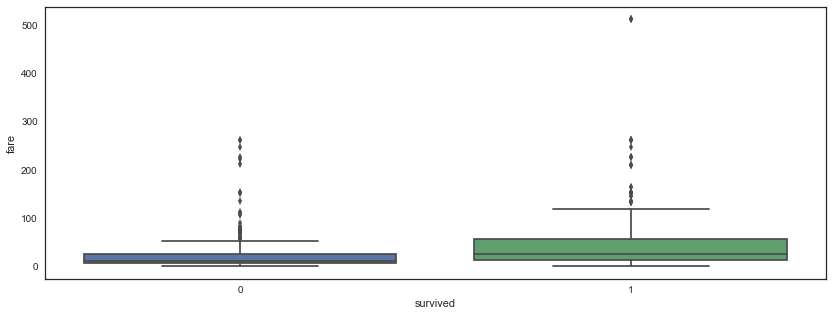

In [125]:
fig,ax=plt.subplots(figsize=(14,5))
sns.boxplot(x="survived",y="fare",data=data,ax=ax)

* 幸存和遇难乘客的年龄分布（分类箱式图）

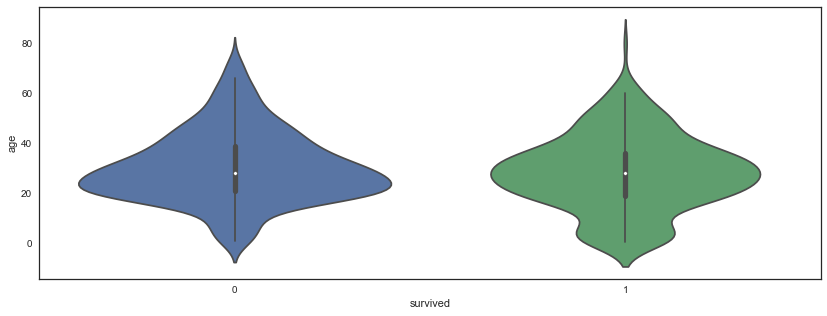

In [127]:
fig,ax=plt.subplots(figsize=(14,5))
sns.violinplot(x="survived",y="age",data=data,ax=ax)

* 不同上船港口的乘客仓位等级分布（分组柱状图）

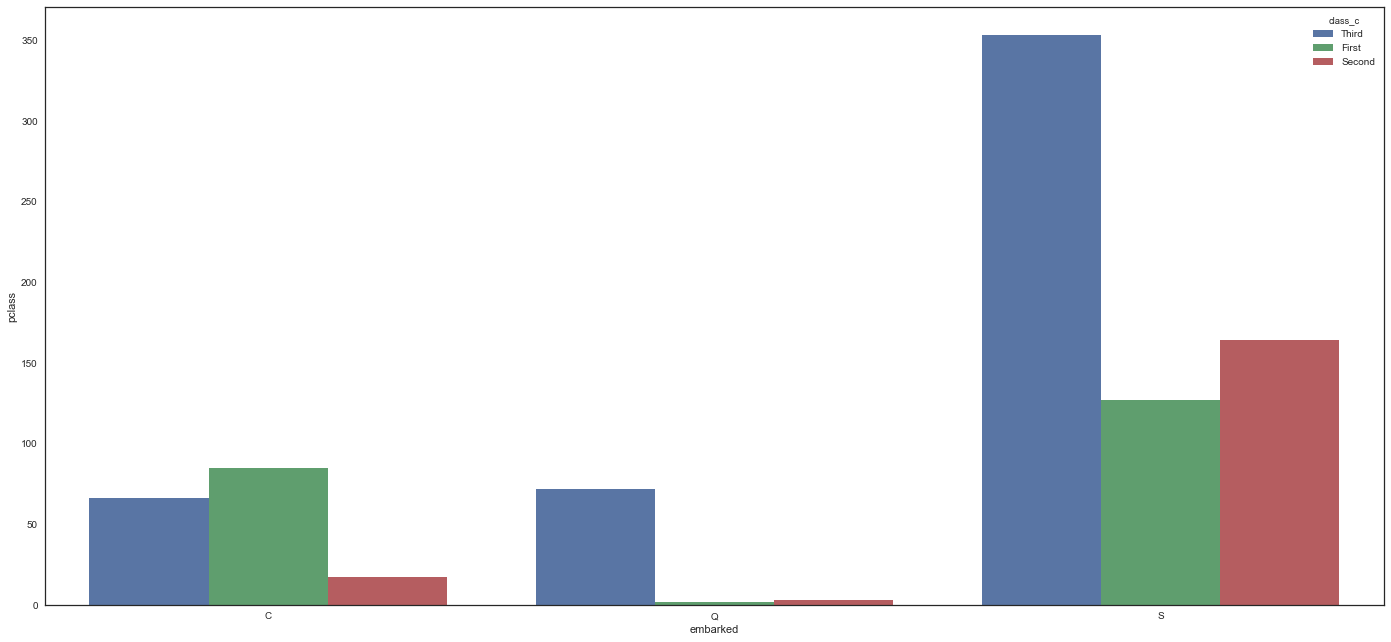

In [134]:
frame=[]
for item in data["class"]:
    temp=data[data["class"]==item].groupby("embarked",as_index=False).count()
    temp["class_c"]=item
    frame.append(temp)
dc=pd.concat(frame)
sns.barplot(x="embarked",y="pclass",hue="class_c",data=dc)

* 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）


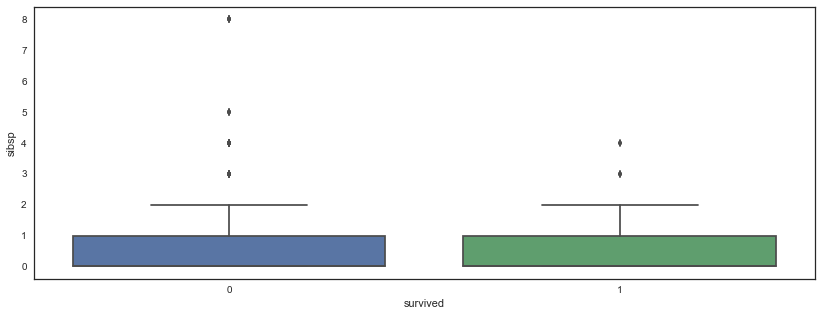

In [148]:
fig,ax=plt.subplots(figsize=(14,5))
sns.boxplot(x="survived",y="sibsp",data=data,ax=ax)

* 幸存和遇难乘客父母子女的数量分布（分类箱式图）


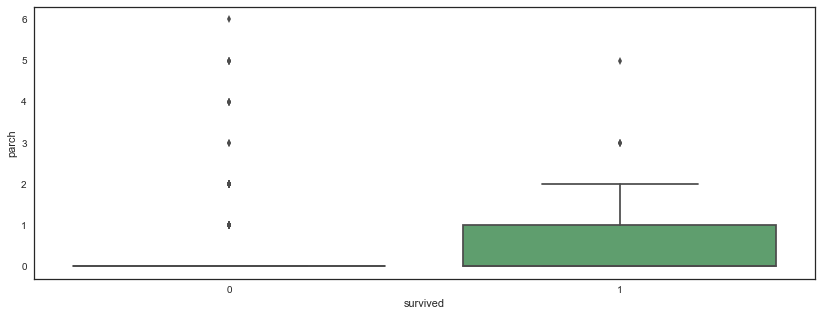

In [149]:
fig,ax=plt.subplots(figsize=(14,5))
sns.boxplot(x="survived",y="parch",data=data,ax=ax)

* 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

In [151]:
frame=[]
for item in data.survived:
    temp=data[data.survived==item].groupby("alone",as_index=False).count()
    temp["survived_n"]=item
    frame.append(temp)    
da=pd.concat(frame)
da.head()

,alone,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,survived_n
0,False,175,175,175,150,175,175,175,175,175,175,175,29,175,175,0
1,True,374,374,374,274,374,374,374,374,374,374,374,38,374,374,0
0,False,179,179,179,160,179,179,179,179,179,179,179,81,179,179,1
1,True,163,163,163,130,163,163,163,161,163,163,163,55,161,163,1
0,False,179,179,179,160,179,179,179,179,179,179,179,81,179,179,1


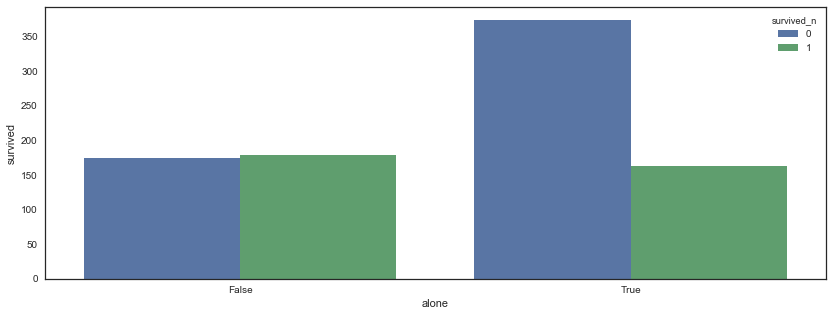

In [152]:
fig,ax=plt.subplots(figsize=(14,5))
sns.barplot(x="alone",y="survived",hue="survived_n",data=da,ax=ax)

### 本阶段课程意见反馈题(10分送分项，非必答)
#### 请同学围绕以下两点进行回答：
- 自身总结：请您对您自己在本周课程的学习，收获，技能掌握等方面进行一次总结 ，也包括有哪些方面存在哪些不足，欠缺，困惑。作为将来回顾学习路径时的依据。


- 课程反馈：请就知识点，进度，难易度，教学方式，考试方式及难易度等方面向我们反馈，督促我们进行更有效的改进。

<hr>
<center><h1>####答卷结束####</h1></center>